<a href="https://colab.research.google.com/github/brianhphillips/testrepo/blob/main/CatBoost_IBMHR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython import get_ipython
from IPython.display import display

In [2]:
!pip install catboost
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.7 MB/s eta 0:00:00


In [3]:
path = kagglehub.dataset_download("pavansubhasht/ibm-hr-analytics-attrition-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/ibm-hr-analytics-attrition-dataset


In [4]:
csv_file = f"{path}/WA_Fn-UseC_-HR-Employee-Attrition.csv"
df = pd.read_csv(csv_file)

In [5]:
target = 'PercentSalaryHike'
X = df.drop(columns=[target])
y = df[target]

In [6]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

In [7]:
for col in categorical_cols:
    if col in X.columns:
        X[col] = X[col].fillna('NaN').astype(str)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    cat_features=categorical_cols,
    verbose=100
)
model.fit(X_train, y_train)

0:	learn: 3.4742317	total: 51.3ms	remaining: 51.3s
100:	learn: 1.9438372	total: 401ms	remaining: 3.57s
200:	learn: 1.5419376	total: 966ms	remaining: 3.84s
300:	learn: 1.1817024	total: 1.41s	remaining: 3.28s
400:	learn: 0.9421006	total: 2.26s	remaining: 3.38s
500:	learn: 0.7535339	total: 3.21s	remaining: 3.2s
600:	learn: 0.6049978	total: 4.11s	remaining: 2.73s
700:	learn: 0.4880337	total: 5.08s	remaining: 2.17s
800:	learn: 0.4054851	total: 6.49s	remaining: 1.61s
900:	learn: 0.3390390	total: 7.58s	remaining: 833ms
999:	learn: 0.2840844	total: 8.47s	remaining: 0us


In [10]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 5.926915266283222


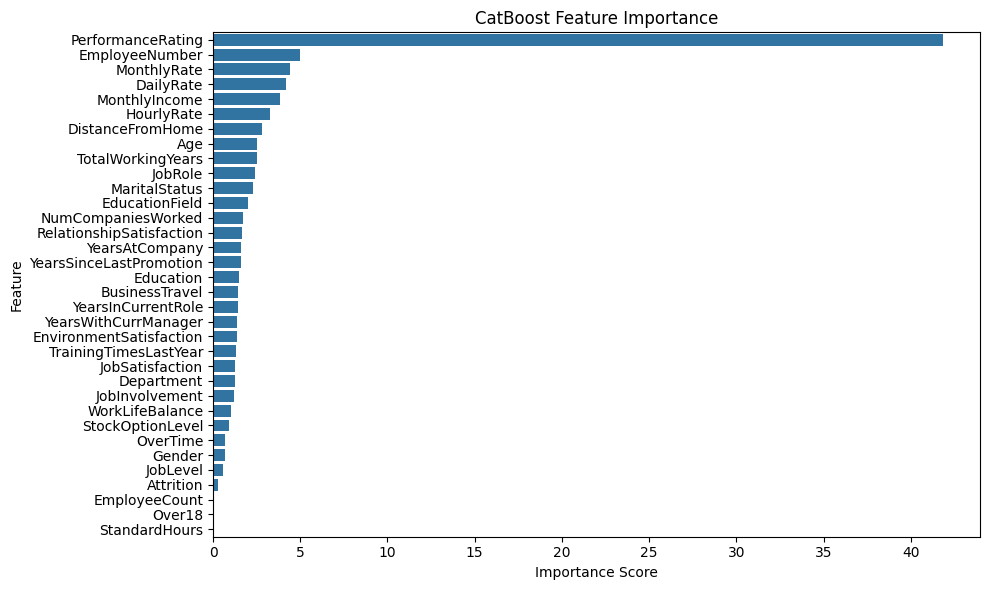

In [11]:
feature_importances = model.get_feature_importance(prettified=True)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importances', y='Feature Id', data=feature_importances.sort_values(by='Importances', ascending=False))
plt.title("CatBoost Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()